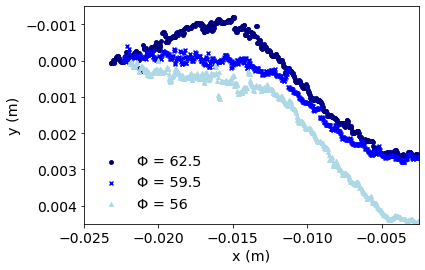

In [9]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.signal import correlate
from matplotlib import pyplot as plt
import matplotlib as mpl

####### GLASS BEADS, good ########

### NOTE ###
    #wrangler working range is 65-125 mm away from surface (6.5 cm to 12.5 cm)

### define file path
    # need to move the saved data from the 'bin' folder to the 'wrangler' folder
    # keep in mind that "ScanData" file in "bin" folder is overwritten each time "Save Profile" is selected in the app

### Volume fraction range: 62.5, 59.5, 56
file_path1 = 'LabData/wrangler/GB_compact.txt'
file_path2 = 'LabData/wrangler/GB_loose2.txt'
file_path3 = 'LabData/wrangler/GB_crit2.txt'
file_path4 = 'LabData/wrangler/GB_565_3.txt'

# each ROW in the wrangler .txt file is a RAY corresponding to a pixel's width in the camera sensor
    #the 0th ELEMENT in a given row is the X-coordinate the laser sheet is interrupted for that RAY
    #the 1st ELEMENT is the Z-coordinate which always zero for our wrangler, since the sheet is 2D, FORGET ABOUT IT
    #the 2nd ELEMENT is the Y coordinate the laser sheet is interrupted for that RAY
    #the 3rd ELEMENT is a measure of intensity of the reflection of the laser light on obstruction, FORGET ABOUT IT

### initialize lists to store the 1st and 3rd columns

    # the following data is for GLASS BEADS #
    
x0 = []
y0 = []

x1 = []
y1 = []

x2 = []
y2 = []


### read the data from the file
with open(file_path1, 'r') as file:
    for line in file:
        
        #split the line into columns
        columns = line.split()
        
        #append the 1st column to x and 3rd column to y
        x0.append(float(columns[0])/10**3) # 10**3 turns the sensor's native mm to m
        #y0.append(float(columns[2])/10**3) #raw
        y0.append(float(columns[2])/10**3 - 0.076) #zeroing out 
        
with open(file_path2, 'r') as file:
    for line in file:
        
        #split the line into columns
        columns2 = line.split()
        
        #append the 1st column to x and 3rd column to y
        x1.append(float(columns2[0])/10**3)
        #y1.append(float(columns2[2])/10**3) #raw
        y1.append(float(columns2[2])/10**3 - 0.0675) #zeroing out
        
with open(file_path4, 'r') as file:
    for line in file:
        
        #split the line into columns
        columns3 = line.split()
        
        #append the 1st column to x and 3rd column to y
        x2.append(float(columns3[0])/10**3)
        #y2.append(float(columns3[2])/10**3) #raw
        y2.append(float(columns3[2])/10**3 - 0.0725) #zeroing out


### plotting data
plt.scatter(x0, y0, marker='o', s = 15, label = "\u03A6 = 62.5", color = 'navy')
plt.scatter(GB595_x1, GB595_y1, marker='x', s = 15, label = "\u03A6 = 59.5", color = 'blue')
plt.scatter(x1, y1, marker='^', s = 15, label = "\u03A6 = 56", color = 'lightblue')
#plt.scatter(GB56_x2, GB56_y2, marker='o', s = 15, label = 'RLP')
#plt.scatter(x2, y2, marker='o', s = 15, label = 'near critical') # this is a little below critical


### plot labels
plt.xlabel('x (m)', fontsize = 'x-large')
plt.ylabel('y (m)', fontsize = 'x-large')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(frameon = False, loc = 'lower left', fontsize = 'x-large')

### axis limits
#plt.ylim(0.067,0.08) #for raw data
plt.ylim(-0.0015,0.0045) #for zeroed data
plt.xlim(-0.025,-0.0025)

plt.gca().invert_yaxis() #invert the y-axis

plt.show()


#### Notes ####

#### you can tell from the difference between first and last y-values that the sensor was tilted slightly, especially obvious in the critical case
#### these are just test trials to show qualitative trends in how surface displacement varies with distance from critical
#### next measurements should ensure that the sensor is level

#### the apparent difference in the trough depth - where the intruder is - is a function of slightly different sensor heights
#### sensor height changes slightly with volume fraction, as the intruder is mounted in one place, and bed height changes with level of compaction


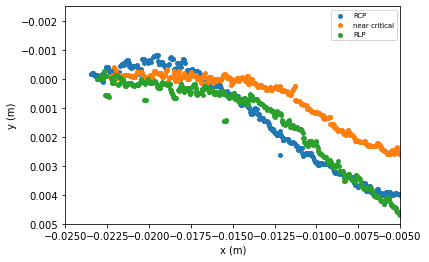

In [10]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.signal import correlate
from matplotlib import pyplot as plt
import matplotlib as mpl

### NOTE ###
    #wrangler working range is 65-125 mm away from surface (6.5 cm to 12.5 cm)

### define file path
    # need to move the saved data from the 'bin' folder to the 'wrangler' folder
    # keep in mind that "ScanData" file in "bin" folder is overwritten each time "Save Profile" is selected in the app

### Volume fraction range: 62.5, 59.5, 56
GB625_file_path1 = 'LabData/wrangler/GB_625_repos.txt'
GB595_file_path2 = 'LabData/wrangler/GB_595_repos.txt'
GB56_file_path3 = 'LabData/wrangler/GB_565_3.txt'


# each ROW in the wrangler .txt file is a RAY corresponding to a pixel's width in the camera sensor
    #the 0th ELEMENT in a given row is the X-coordinate the laser sheet is interrupted for that RAY
    #the 1st ELEMENT is the Z-coordinate which always zero for our wrangler, since the sheet is 2D, FORGET ABOUT IT
    #the 2nd ELEMENT is the Y coordinate the laser sheet is interrupted for that RAY
    #the 3rd ELEMENT is a measure of intensity of the reflection of the laser light on obstruction, FORGET ABOUT IT

### initialize lists to store the 1st and 3rd columns

    # the following data is for GLASS BEADS #
    
GB625_x0 = []
GB625_y0 = []

GB595_x1 = []
GB595_y1 = []

GB56_x2 = []
GB56_y2 = []


### read the data from the file
with open(GB625_file_path1, 'r') as file:
    for line in file:
        
        #split the line into columns
        columns = line.split()
        
        #append the 1st column to x and 3rd column to y
        GB625_x0.append(float(columns[0])/10**3) # 10**3 turns the sensor's native mm to m
        #GB625_y0.append(float(columns[2])/10**3) #raw
        GB625_y0.append(float(columns[2])/10**3 - 0.078) #zeroing out 
        
with open(GB595_file_path2, 'r') as file:
    for line in file:
        
        #split the line into columns
        columns2 = line.split()
        
        #append the 1st column to x and 3rd column to y
        GB595_x1.append(float(columns2[0])/10**3)
        #GB595_y1.append(float(columns2[2])/10**3) #raw
        GB595_y1.append(float(columns2[2])/10**3 - 0.0703) #zeroing out 

        
with open(GB56_file_path3, 'r') as file:
    for line in file:
        
        #split the line into columns
        columns3 = line.split()
        
        #append the 1st column to x and 3rd column to y
        GB56_x2.append(float(columns3[0])/10**3)
        #GB56_y2.append(float(columns3[2])/10**3) #raw
        GB56_y2.append(float(columns3[2])/10**3 - 0.0755) #zeroing out 



### plotting data
plt.scatter(GB625_x0, GB625_y0, marker='o', s = 15, label = 'RCP')
plt.scatter(GB595_x1, GB595_y1, marker='o', s = 15, label = 'near critical') 
plt.scatter(GB56_x2, GB56_y2, marker='o', s = 15, label = 'RLP') 

### plot labels
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend(fontsize = 'x-small')

### axis limits
plt.ylim(-0.0025,0.005)
plt.xlim(-0.025,-0.005)

plt.gca().invert_yaxis() #invert the y-axis

plt.show()

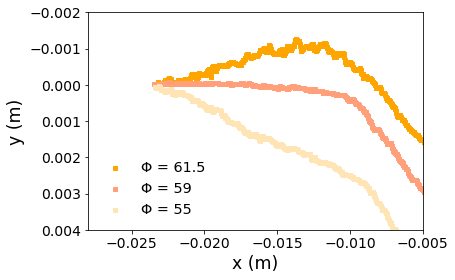

In [1]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.signal import correlate
from matplotlib import pyplot as plt
import matplotlib as mpl

####### SAND #########

### NOTE ###
    #wrangler working range is 65-125 mm away from surface (6.5 cm to 12.5 cm)

### define file path
    # need to move the saved data from the 'bin' folder to the 'wrangler' folder
    # keep in mind that "ScanData" file in "bin" folder is overwritten each time "Save Profile" is selected in the app

### Volume fraction range: 61.5, 59, 55
sand61_file_path1 = 'LabData/wrangler/sand_61_repos.txt'
sand59_file_path2 = 'LabData/wrangler/sand_59_test.txt'
sand56_file_path3 = 'LabData/wrangler/sand_56_test.txt'


# each ROW in the wrangler .txt file is a RAY corresponding to a pixel's width in the camera sensor
    #the 0th ELEMENT in a given row is the X-coordinate the laser sheet is interrupted for that RAY
    #the 1st ELEMENT is the Z-coordinate which always zero for our wrangler, since the sheet is 2D, FORGET ABOUT IT
    #the 2nd ELEMENT is the Y coordinate the laser sheet is interrupted for that RAY
    #the 3rd ELEMENT is a measure of intensity of the reflection of the laser light on obstruction, FORGET ABOUT IT

### initialize lists to store the 1st and 3rd columns

    # the following data is for GLASS BEADS #
    
sand61_x0 = []
sand61_y0 = []

sand59_x1 = []
sand59_y1 = []

sand56_x2 = []
sand56_y2 = []


### read the data from the file
with open(sand61_file_path1, 'r') as file:
    for line in file:
        
        #split the line into columns
        columns = line.split()
        
        #append the 1st column to x and 3rd column to y
        sand61_x0.append(float(columns[0])/10**3) # 10**3 turns the sensor's native mm to m
        #sand61_y0.append(float(columns[2])/10**3) #raw
        sand61_y0.append(float(columns[2])/10**3 - 0.076) #zeroing out 
        
with open(sand59_file_path2, 'r') as file:
    for line in file:
        
        #split the line into columns
        columns2 = line.split()
        
        #append the 1st column to x and 3rd column to y
        sand59_x1.append(float(columns2[0])/10**3)
        #sand59_y1.append(float(columns2[2])/10**3) #raw
        sand59_y1.append(float(columns2[2])/10**3 - 0.0777) #zeroing out 

        
with open(sand56_file_path3, 'r') as file:
    for line in file:
        
        #split the line into columns
        columns3 = line.split()
        
        #append the 1st column to x and 3rd column to y
        sand56_x2.append(float(columns3[0])/10**3)
        #sand56_y2.append(float(columns3[2])/10**3) #raw
        sand56_y2.append(float(columns3[2])/10**3 - 0.0772) #zeroing out 


        
### plotting data
plt.scatter(sand61_x0, sand61_y0, marker='s', s = 15, label = "\u03A6 = 61.5", color = 'orange')
plt.scatter(sand59_x1, sand59_y1, marker='s', s = 15, label = "\u03A6 = 59", color = 'lightsalmon') 
plt.scatter(sand56_x2, sand56_y2, marker='s', s = 15, label = "\u03A6 = 55", color = 'moccasin') 

### plot labels
plt.xlabel('x (m)', size = 'xx-large')
plt.ylabel('y (m)', size = 'xx-large')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize = 'x-large', loc = 'lower left', edgecolor = 'none')

### axis limits
plt.ylim(-0.002,0.004)
plt.xlim(-0.028,-0.005)

plt.gca().invert_yaxis() #invert the y-axis

plt.show()

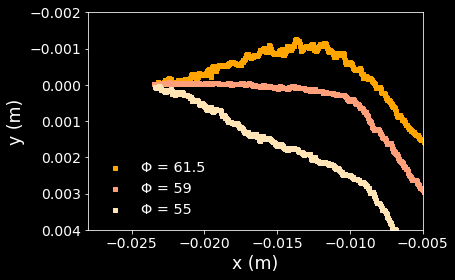

In [2]:
plt.style.use('dark_background')  # sets a black background and white text/ticks by default

# If you want to manually customize instead of using the style, do this:
fig, ax = plt.subplots()

fig.patch.set_facecolor('black')  # figure background
ax.set_facecolor('black')         # axes background

# your scatter plots
ax.scatter(sand61_x0, sand61_y0, marker='s', s=15, label="\u03A6 = 61.5", color='orange')
ax.scatter(sand59_x1, sand59_y1, marker='s', s=15, label="\u03A6 = 59", color='lightsalmon')
ax.scatter(sand56_x2, sand56_y2, marker='s', s=15, label="\u03A6 = 55", color='moccasin')

# labels
ax.set_xlabel('x (m)', fontsize='xx-large', color='white')
ax.set_ylabel('y (m)', fontsize='xx-large', color='white')

# tick params - color white
ax.tick_params(axis='both', which='major', labelsize=14, colors='white')

# legend with white text and no frame
leg = ax.legend(fontsize='x-large', loc='lower left', edgecolor='none')
for text in leg.get_texts():
    text.set_color('white')

# axis limits
ax.set_ylim(-0.002, 0.004)
ax.set_xlim(-0.028, -0.005)

ax.invert_yaxis()

plt.show()


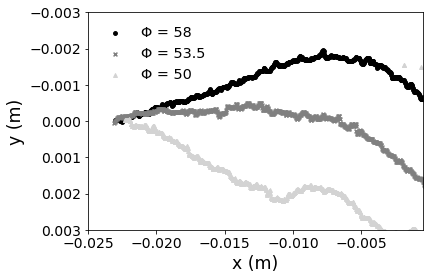

In [13]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.signal import correlate
from matplotlib import pyplot as plt
import matplotlib as mpl

########## LHS-1, no fines ##########

### NOTE ###
    #wrangler working range is 65-125 mm away from surface (6.5 cm to 12.5 cm)

### define file path
    # need to move the saved data from the 'bin' folder to the 'wrangler' folder
    # keep in mind that "ScanData" file in "bin" folder is overwritten each time "Save Profile" is selected in the app

### Volume fraction range: 58, 53.5, 50
LHS158_file_path1 = 'LabData/wrangler/LHS1_58_test.txt'
LHS1535_file_path2 = 'LabData/wrangler/LHS1_535_repos.txt'
LHS150_file_path3 = 'LabData/wrangler/LHS1_50_test.txt'


# each ROW in the wrangler .txt file is a RAY corresponding to a pixel's width in the camera sensor
    #the 0th ELEMENT in a given row is the X-coordinate the laser sheet is interrupted for that RAY
    #the 1st ELEMENT is the Z-coordinate which always zero for our wrangler, since the sheet is 2D, FORGET ABOUT IT
    #the 2nd ELEMENT is the Y coordinate the laser sheet is interrupted for that RAY
    #the 3rd ELEMENT is a measure of intensity of the reflection of the laser light on obstruction, FORGET ABOUT IT

### initialize lists to store the 1st and 3rd columns

    # the following data is for GLASS BEADS #
    
LHS158_x0 = []
LHS158_y0 = []

LHS1535_x1 = []
LHS1535_y1 = []

LHS150_x2 = []
LHS150_y2 = []


### read the data from the file
with open(LHS158_file_path1, 'r') as file:
    for line in file:
        
        #split the line into columns
        columns = line.split()
        
        #append the 1st column to x and 3rd column to y
        LHS158_x0.append(float(columns[0])/10**3) # 10**3 turns the sensor's native mm to m
        #LHS158_y0.append(float(columns[2])/10**3) #raw
        LHS158_y0.append(float(columns[2])/10**3 - 0.0748) #zeroing out 
        
with open(LHS1535_file_path2, 'r') as file:
    for line in file:
        
        #split the line into columns
        columns2 = line.split()
        
        #append the 1st column to x and 3rd column to y
        LHS1535_x1.append(float(columns2[0])/10**3)
        #LHS1535_y1.append(float(columns2[2])/10**3) #raw
        LHS1535_y1.append(float(columns2[2])/10**3 - 0.0750) #zeroing out 

        
with open(LHS150_file_path3, 'r') as file:
    for line in file:
        
        #split the line into columns
        columns3 = line.split()
        
        #append the 1st column to x and 3rd column to y
        LHS150_x2.append(float(columns3[0])/10**3)
        #LHS150_y2.append(float(columns3[2])/10**3) #raw
        LHS150_y2.append(float(columns3[2])/10**3 - 0.07) #zeroing out 



### plotting data
plt.scatter(LHS158_x0, LHS158_y0, marker='o', s = 15, label = "\u03A6 = 58", color = 'black')
plt.scatter(LHS1535_x1, LHS1535_y1, marker='x', s = 15, label = "\u03A6 = 53.5", color = 'gray') 
plt.scatter(LHS150_x2, LHS150_y2, marker='^', s = 15, label = "\u03A6 = 50", color = 'lightgray') 

### plot labels
plt.xlabel('x (m)', size = 'xx-large')
plt.ylabel('y (m)', size = 'xx-large')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize = 'x-large', loc = 'upper left', edgecolor = 'none')

### axis limits
plt.ylim(-0.003,0.003)
plt.xlim(-0.025,-0.0005)

plt.gca().invert_yaxis() #invert the y-axis

plt.show()